# KMeans

KMeans es un algoritmo de clusterización utilizado en el tutorial introductorio a clustering. Es un método basado en el cálculo de distancia entre puntos y su objetivo principal es dividir un conjunto de datos en múltiples grupos, de tal manera que los elementos de un determinado grupo o clúster sean similares entre sí, mientras que los elementos de otros grupos sean distintos.

El algoritmo consta de las siguientes etapas o pasos:
* Inicialización: El primer paso es indicar una cantidad inicial de cluster o grupos denominados K. Luego, se seleccionan K puntos iniciales como centros de los clúster, estos puntos iniciales se pueden seleccionar aleatoriamente o mediante algún otro método.
* Asignación: Para cada punto de datos en el conjunto, se calcula la distancia entre los puntos y el K centro de los clúster. El punto se asigna al clúster cuyo centro está más cerca de él. Esto crea K grupos iniciales.
* Actualización: Una vez que todos los puntos de datos se han asignado a un clúster, se recalculan los centros de cada clúster como el promedio de todos los puntos asignados a ese clúster. Estos nuevos centros representan el "centroide" de cada grupo.
* Iteración: Los pasos 2 y 3 se repiten iterativamente hasta que se cumpla algún criterio de detención, como la convergencia (cuando los centros de los clústeres dejan de cambiar significativamente) o después de un número fijo de iteraciones.
* Resultados: Una vez que el algoritmo ha convergido, los puntos de datos se encuentran asignados a sus respectivos clústeres. El resultado es un conjunto de K grupos, donde cada grupo contiene puntos de datos similares entre sí y diferentes de los puntos en otros grupos.

![image.gif](./src/kmeans.gif)

## Ventajas de este algoritmo:

* Alto performance
* Simple
* Resultados interpretables
* Garantiza convergencia
* Se adapta a nuevos datos

## Desventajas:

* Replicabilidad: al iniciar aleatoriamente los centroides, es muy complejo replicar los mismos resultados.
* Le afectan outliers: esto quiere decir que si encontramos datos anómalos, estos afectan a la hora de determinar el centroide del cluster, afectando su rendimiento.
* Mejor performance en datos esféricos.
* Se debe escoger el valor de K manualmente.
* Es afectado por alta dimensionalidad.

## ¿Cuándo utilizar KMeans?

* Se conoce la cantidad de clústers esperados.
* Se desea obtener resultados rápidos.
* Se desea obtener resultados interpretables.
* Cuando el dataset tiene forma esférica.
* Se desea obtener resultados escalables.

## Implementando KMeans

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Requiere instalación "pip install yellowbrick"
from yellowbrick.cluster import SilhouetteVisualizer

### Preparando nuestros datos

In [70]:
x, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [71]:
df_blobs = pd.DataFrame({
    'x1' : x[:,0],
    'x2' : x[:,1],
    'y' : y
})

In [72]:
df_centers = pd.DataFrame({
    'x1' : c[:,0],
    'x2' : c[:,1]
})

### Visualización de datos

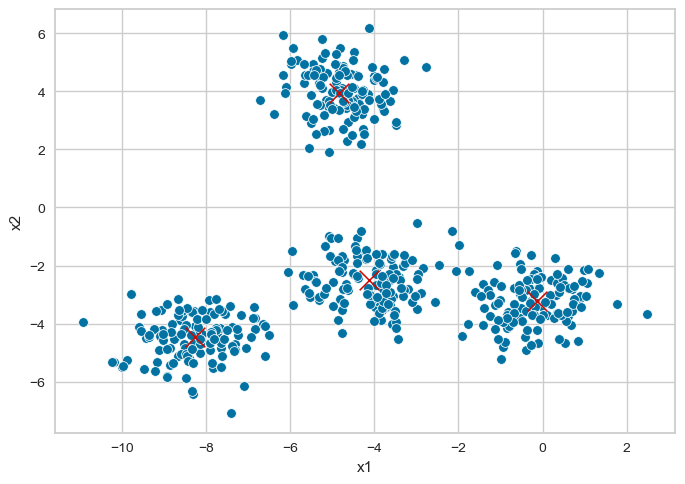

In [73]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='x', s=200, c='r')
plt.show()

### Aplicando KMeans

In [74]:
def visualizar_clusters(k):
    kmeans = KMeans(n_clusters=k, n_init=10)
    df_clusters = kmeans.fit_predict(x)
    df_blobs['cluster'] = df_clusters
    # Obtener los centroides
    centers = kmeans.cluster_centers_
    df_kmeans_centers = pd.DataFrame({
        'x1' : centers[:,0],
        'x2' : centers[:,1]
    })
    
    sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers, x='x1', y='x2', marker='o', s=150, c='y')
    sns.scatterplot(data=df_kmeans_centers, x='x1', y='x2', marker='x', s=200, c='g')
    plt.show()

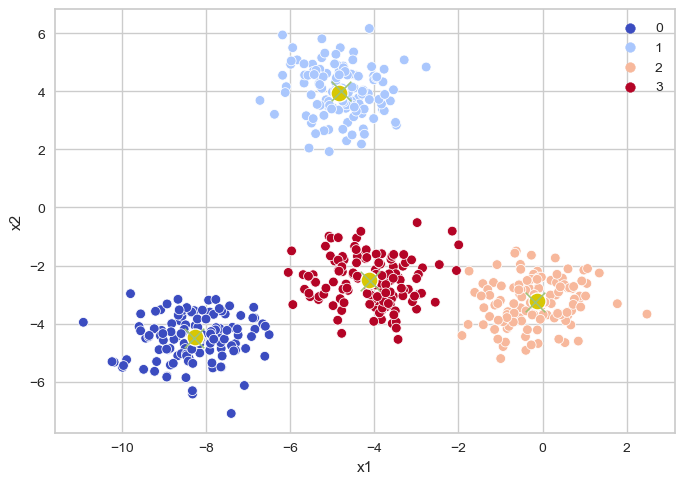

In [75]:
visualizar_clusters(4)

## Encontrar el valor de K

Recordando que K corresponde al número de clúster que se configura al entrenar un modelo para determinar la salida de la clusterización. En ocasiones, este valor se desconoce el valor adecuado para K y ante este problema existen diferentes métodos para resolverlo. A continuación, se presentan 2 técnicas.

### Método del codo (Elbow)

Consiste en trazar la suma de las distancias al cuadrado entre cada punto de datos y su centroide asignado para diferentes valores de k. En este método, buscamos el valor de k donde la disminución en la suma de las distancias al cuadrado se ralentiza y forma una curva similar a un codo. Este valor de k se considera como el número óptimo de clústeres.

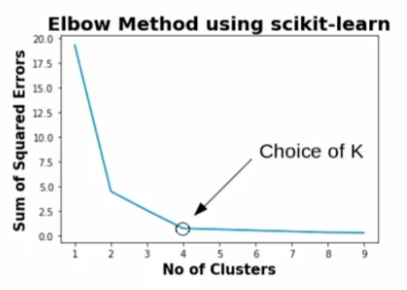

In [76]:
sum_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(x)
    sum_squared_distances.append(km.inertia_)

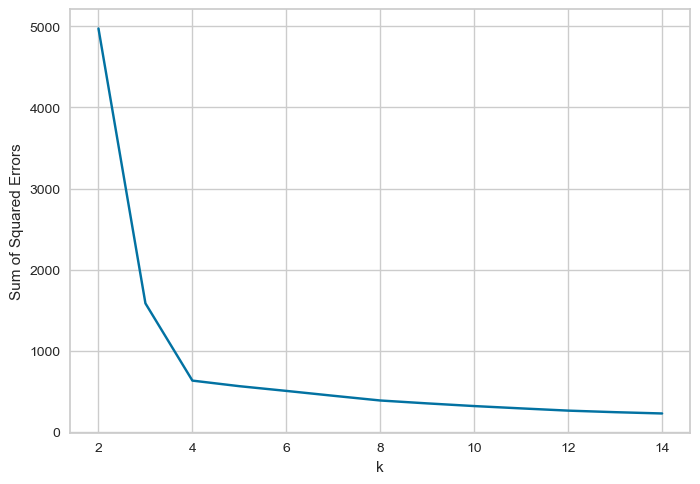

In [77]:
plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors')
plt.show()

### Coeficiente de silueta

Consiste en calcular el coeficiente de silueta para diferentes valores de k. Este coeficiente es una medida que evalúa cuán parecido está un punto de datos a su clúster asignado en comparación con los otros clústeres. Básicamente, se cuantifica qué tan bien se agrupa un punto con respecto a su propio clúster en comparación con otros clústeres cercanos. Al probar diferentes valores de k y calcular los coeficientes de silueta correspondientes, podemos determinar qué valor de k maximiza el coeficiente de silueta promedio.

In [78]:
silhoutte_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(x)
    y = km.predict(x)
    silhoutte_scores.append(silhouette_score(x, y))

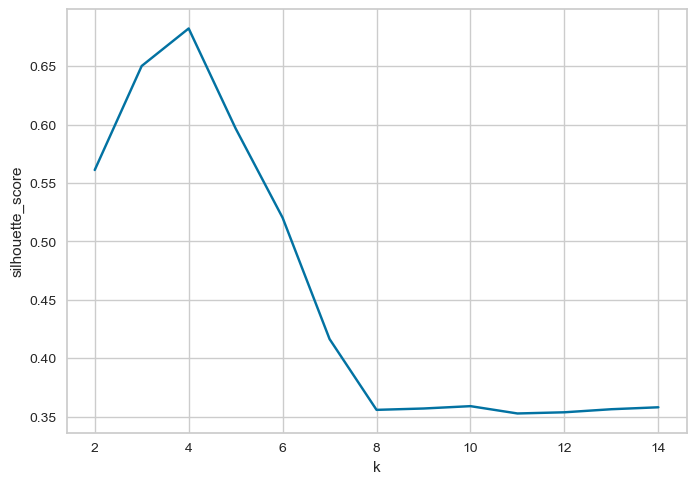

In [79]:
plt.plot(K, silhoutte_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

#### Gráfica para la observación

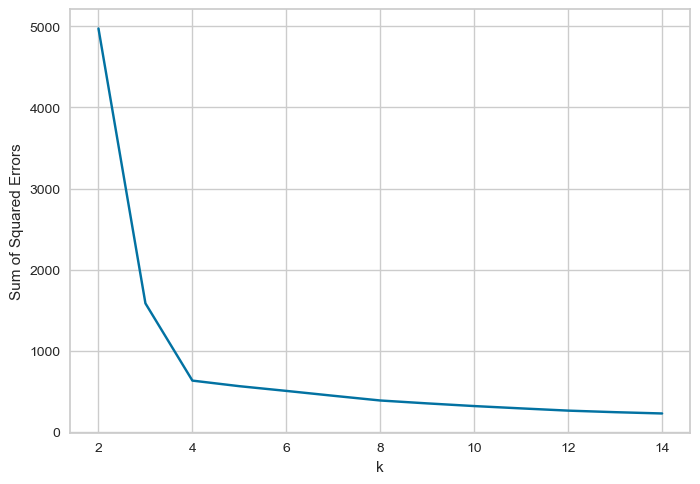
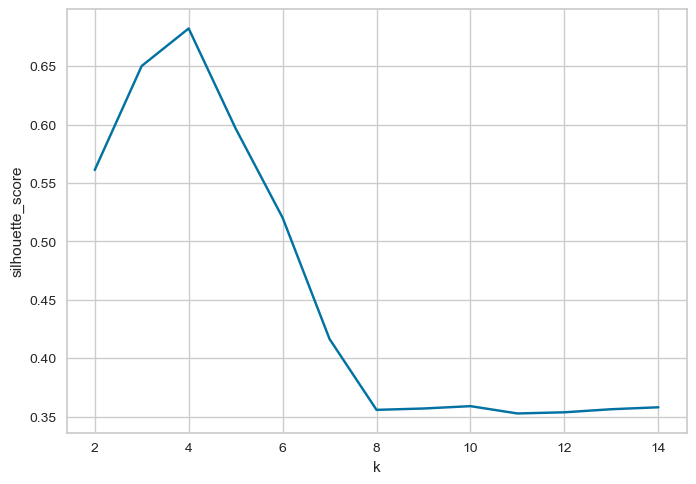

A modo de observación, tanto en el método del codo como en el método de silueta podemos observar que el valor de K óptimo es 4. Sin embargo, una diferencia notoria entre ambos métodos, es que el método de Codo nos arroja como posible valor óptimo el 4, dónde la suma de cuadrados o residuos sea la mínima (punto más bajo) en la menor cantidad de clusters posibles (k=4), mientras que en el método de silueta se busca que la sumado de residuos se la máxima (más alta) en la menor cantidad de clusters posibles (k=4). IMPORTANTE: Esta observación puede variar o incluso no cumplirse al generar un nuevo dataset.

## Evaluar clusters con KMeans

A partir de este momento, vamos a visualizar la gráfica con el valor encontrado de K = 4 según los métodos antes observados.

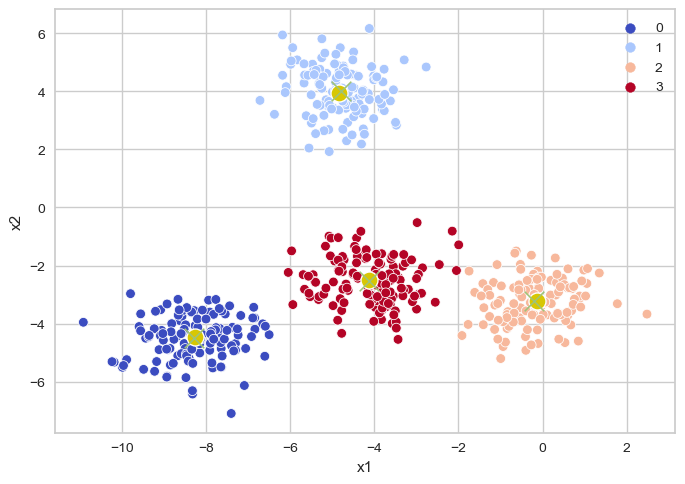

In [81]:
visualizar_clusters(4)

Generamos el modelo con el valor de K encontrado.

In [82]:
km = KMeans(n_clusters=4, n_init=10)

Utilizamos la librería SilhouetteVisualizer para generar una gráfica del coeficiente de Silueta con el modelo de entrenamiento de KMeans.

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, n_init=10))

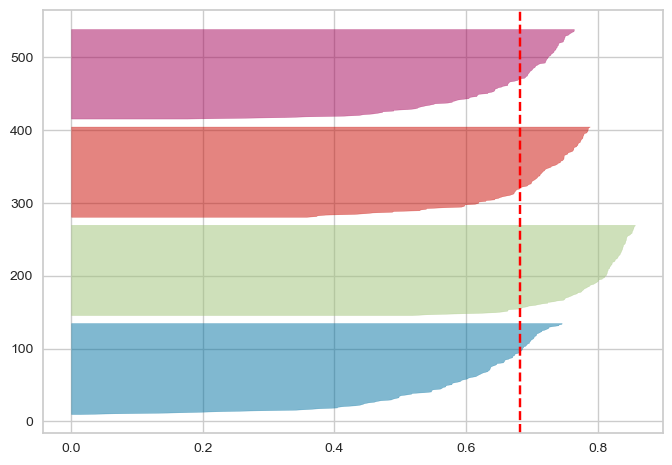

In [83]:
visualizador = SilhouetteVisualizer(km, colors='yellowbrick')
visualizador.fit(x)

Visualmente a través del modelo de Silueta, podemos concluir que hay un clúster que está más alejado de los otros a nivel de distancia, dónde la línea punteada de color rojo nos indica el coeficiente de silueta.